# 1. Basic Data Exploration:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data_frame = pd.read_csv("/content/Salaries.csv")

# عدد الصفوف والأعمدة
num_rows,num_columns= data_frame.shape

print("عدد الصفوف:", num_rows)
print("عدد الأعمدة:", num_columns)

# أنواع البيانات لكل عمود
data_types = data_frame.dtypes
print("أنواع البيانات:")
print(data_types)

# التحقق من وجود قيم مفقودة في كل عمود
missing_values = data_frame.isnull().sum()
print("عدد القيم المفقودة في كل عمود:")
print(missing_values)


عدد الصفوف: 30362
عدد الأعمدة: 13
أنواع البيانات:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                float64
Notes               float64
Agency               object
Status              float64
dtype: object
عدد القيم المفقودة في كل عمود:
Id                      0
EmployeeName            1
JobTitle                1
BasePay                 1
OvertimePay             1
OtherPay                1
Benefits            30362
TotalPay                1
TotalPayBenefits        1
Year                    1
Notes               30362
Agency                  1
Status              30362
dtype: int64


#2. Descriptive Statistics:

In [ ]:
# Calculate mean salary
mean_salary = data_frame['TotalPayBenefits'].mean()

# Calculate median salary
median_salary = data_frame['TotalPayBenefits'].median()

# Calculate mode of salary
mode_salary = data_frame['TotalPayBenefits'].mode()

# Calculate minimum and maximum salary
min_salary = data_frame['TotalPayBenefits'].min()
max_salary = data_frame['TotalPayBenefits'].max()

# Calculate range of salaries
salary_range = max_salary - min_salary

# Calculate standard deviation of salary
std_salary = data_frame['TotalPayBenefits'].std()

# Print the calculated statistics
print("Mean Salary:", mean_salary)
print("Median Salary:", median_salary)
print("Mode Salary:", mode_salary)
print("Minimum Salary:", min_salary)
print("Maximum Salary:", max_salary)
print("Salary Range:", salary_range)
print("Standard Deviation of Salary:", std_salary)
# Or in a short way
print(" \n Print the calculated statistics: \n",data_frame['TotalPayBenefits'].describe())

Mean Salary: 84314.04901617205
Median Salary: 77318.23
Mode Salary: 0    123290.7
Name: TotalPayBenefits, dtype: float64
Minimum Salary: 14682.22
Maximum Salary: 567595.43
Salary Range: 552913.2100000001
Standard Deviation of Salary: 41207.91060531705
 
 Print the calculated statistics: 
 count     30361.000000
mean      84314.049016
std       41207.910605
min       14682.220000
25%       55316.810000
50%       77318.230000
75%      109822.320000
max      567595.430000
Name: TotalPayBenefits, dtype: float64


# 3. Data Cleaning:

In [ ]:

#استدال القيم النقيصة بي قيم متوسط العامود
data_frame.BasePay.fillna(data_frame.BasePay.mean(), inplace=True)
data_frame.OvertimePay.fillna(data_frame.OvertimePay.mean(), inplace=True)
data_frame.OtherPay.fillna(data_frame.OtherPay.mean(), inplace=True)
data_frame.TotalPayBenefits.fillna(data_frame.TotalPayBenefits.mean(), inplace=True)
#حسب الطريقة المتبعةBenefits  استبدل القيم الناقصة في عامود
#data_frame['Benefits'] = data_frame['TotalPayBenefits'] - data_frame['TotalPay']
#data_frame['Benefits'] == 0
data_frame['Benefits'] = data_frame['Benefits'].fillna(0)
data_frame['Notes'] = data_frame['Notes'].fillna(0)
data_frame['Status'] = data_frame['Status'].fillna(0)
data_frame['EmployeeName'] = data_frame['EmployeeName'].fillna(0)
# استبدال القيم الناقصة بالمنوال
data_frame['Year'].fillna(data_frame['Year'].mode()[0], inplace=True)
data_frame['Agency'].fillna(data_frame['Agency'].mode()[0], inplace=True)
data_frame['JobTitle'].fillna(data_frame['JobTitle'].mode()[0], inplace=True)
data_frame.TotalPay.fillna(data_frame.OtherPay.mean(), inplace=True)
# التحقق من القيم المفقودة في كل عمود
missing_values = data_frame.isnull().sum()
print('القيم المفقودة في كل عمود:')
print(missing_values)



القيم المفقودة في كل عمود:
Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Notes               0
Agency              0
Status              0
dtype: int64


# 4. Basic Data Visualization:

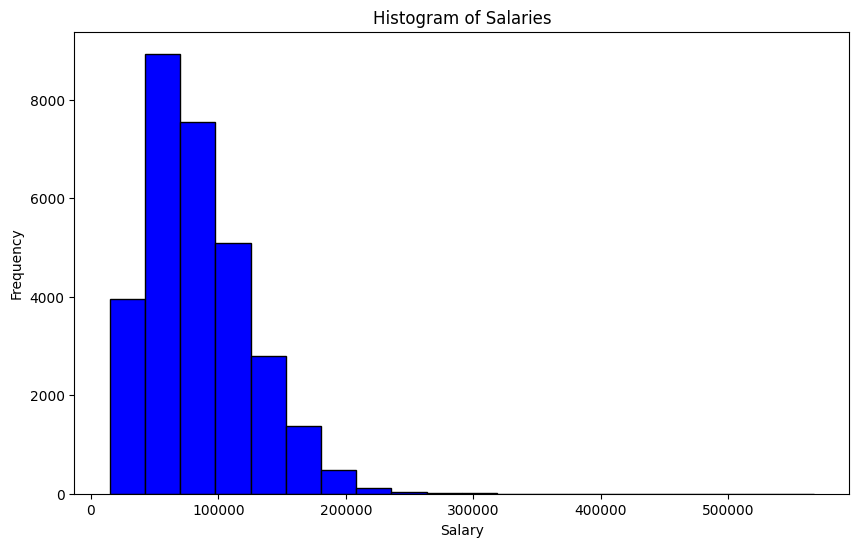

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt




# Create histograms or bar charts to visualize the distribution of salaries
plt.figure(figsize=(10, 6))
plt.hist(data_frame["TotalPayBenefits"], bins=20, color="blue", edgecolor="black")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Histogram of Salaries")
plt.show()



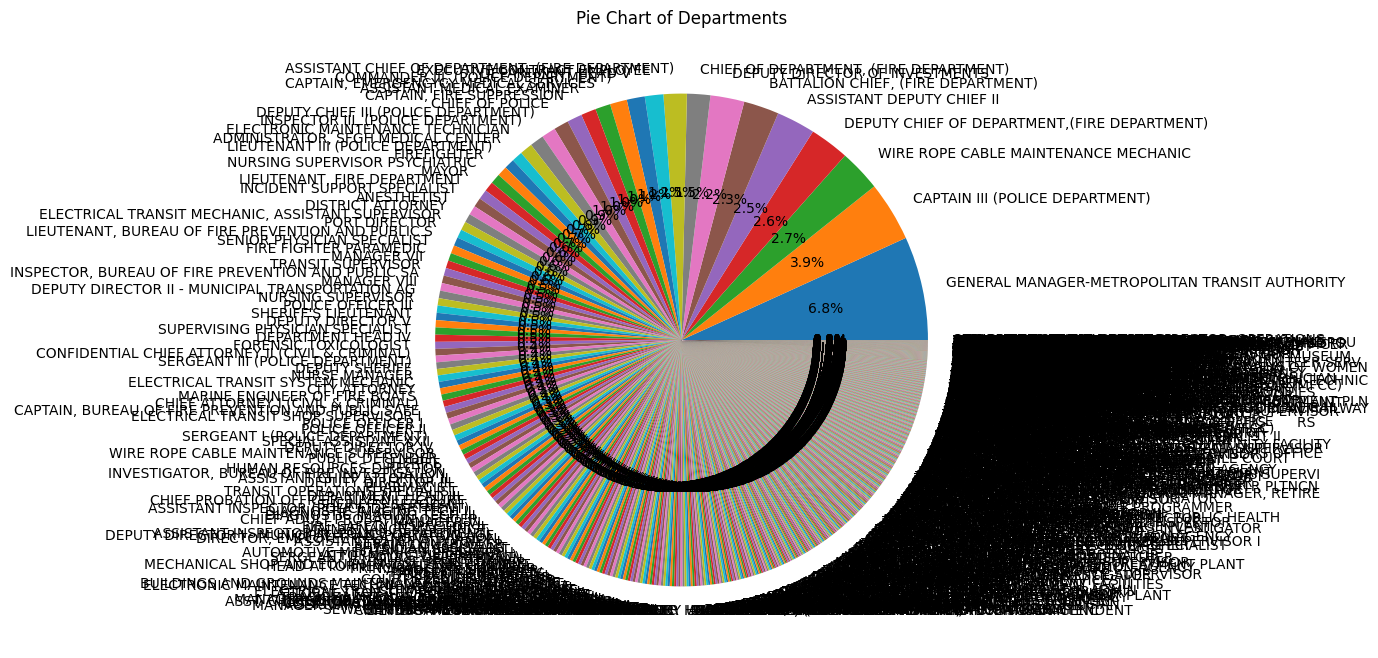

In [ ]:
# Create pie charts to represent the proportion of employees in different departments
plt.figure(figsize=(8, 8))
plt.pie(data_frame["JobTitle"].value_counts(), labels=data_frame["JobTitle"].unique(), autopct="%1.1f%%")
plt.title("Pie Chart of Departments")
plt.show()

# 5. Grouped Analysis:

In [ ]:
import pandas as pd
# إنشاء DataFrame مع البيانات الخاصة بك
# قم بإنشاء DataFrame مع أعمدة 'TotalPayBenefits' و 'BasePay'
data_frame = pd.DataFrame({
    'BasePay': data_frame['BasePay'].values,
    'Year': data_frame['Year'].values,
    'JobTitle': data_frame['JobTitle'].values

})

# تجميع البيانات بواسطة عمودي "JobTitle" و "Year" وحساب الإحصائيات الملخصة
grouped_data = data_frame.groupby(['JobTitle', 'Year'])
summary_statistics = grouped_data['BasePay'].mean()

# طباعة الإحصائيات الملخصة
print(summary_statistics)

JobTitle                                        Year  
ACCOUNT CLERK                                   2011.0    45771.337692
ACCOUNTANT                                      2011.0    58303.965000
ACCOUNTANT INTERN                               2011.0    47951.251250
ACUPUNCTURIST                                   2011.0    66374.400000
ADMINISTRATIVE ANALYST                          2011.0    67397.078161
                                                              ...     
WORKER'S COMPENSATION ADJUSTER                  2011.0    73558.886190
WORKER'S COMPENSATION SUPERVISOR I              2011.0    90966.140000
X-RAY LABORATORY AIDE                           2011.0    50857.987500
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS  2011.0    52609.910000
ZOO CURATOR                                     2011.0    43148.000000
Name: BasePay, Length: 1026, dtype: float64


# 6. Simple Correlation Analysis:

Correlation coefficient: -0.1052409281185873


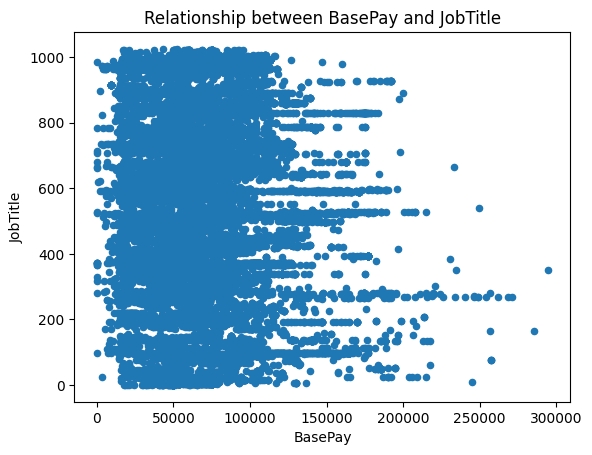

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# قم بإنشاء DataFrame مع أعمدة 'TotalPayBenefits' و 'BasePay'
data_frame = pd.DataFrame({
    'BasePay': data_frame['BasePay'].astype(float),
     'JobTitle': data_frame['JobTitle'].values
})
data_frame['JobTitle'] = pd.Categorical(data_frame['JobTitle'])
data_frame['JobTitle'] = data_frame['JobTitle'].cat.codes
# Calculate the correlation coefficient
correlation = data_frame['BasePay'].corr(data_frame['JobTitle'])

# Print the correlation coefficient
print("Correlation coefficient:", correlation)

# Plot the scatter plot
data_frame.plot.scatter(x='BasePay', y='JobTitle')
plt.xlabel('BasePay')
plt.ylabel('JobTitle')
plt.title('Relationship between BasePay and JobTitle')
plt.show()

#7. Summary of Insights:

In [ ]:
'''

Summary of Insights:

    The findings and insights from the analyses provide a comprehensive understanding of the dataset, its characteristics, and the relationships between variables.
    Key insights may include the central tendency and variability of salaries, the distribution of salaries, the proportion of employees in different departments, and any correlations or relationships observed.
    These insights can inform decision-making processes related to compensation, workforce planning, and resource allocation within the organization.

'''